Lection 4, homework-1
==

*2022-04-23, Mike N*

### Подготовка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

2022-04-23 18:32:37.929757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-23 18:32:37.929781: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
%who

Activation	 Dense	 Dropout	 Sequential	 mnist	 np	 np_utils	 plt	 random	 
x_test	 x_train	 y_test	 y_train	 


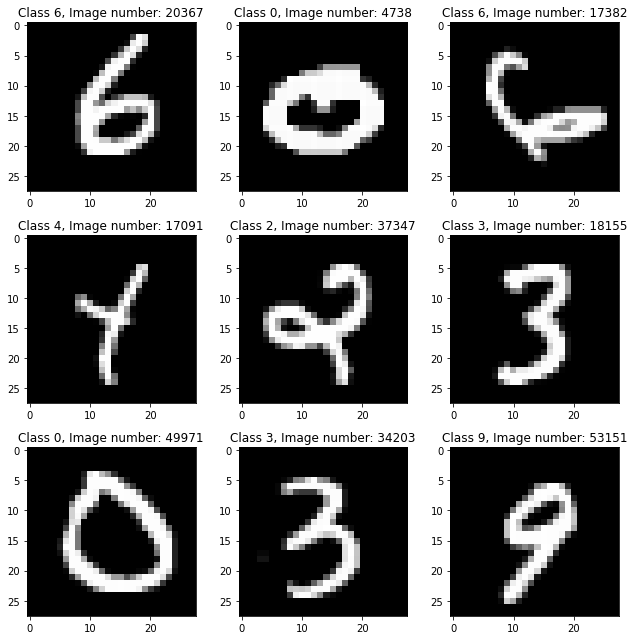

In [6]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}, Image number: {}".format(y_train[num], num))
    
plt.tight_layout()

In [7]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(x_train[22660])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0  147  219   25    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0   65  250  254   46    0    0    0    0    0    0   23    6  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    4  225  254  176    0    0    0    0    0    0  105  231   41  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0   54  250  254   66    0    0    0    0    0    0  151  254  194  0  0  0  0  0  
0  0  0  0  0    0    0    0    

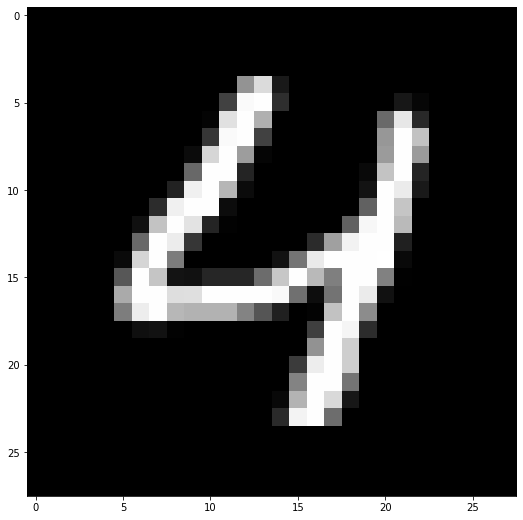

In [8]:
plt.imshow(x_train[22660], cmap='gray', interpolation='none')

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print("Training matrix shape", x_train.shape)
print("Testing mayrix shape", x_test.shape)

Training matrix shape (60000, 784)
Testing mayrix shape (10000, 784)


In [10]:
y_train[22660]

4

Конвертируем из числа в двоичный формат

In [11]:
nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [12]:
print(y_train[22660], Y_train[22660])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Строим сеть:

In [13]:
model = Sequential()

2022-04-23 18:33:33.690515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-23 18:33:33.690565: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-23 18:33:33.690593: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fermer): /proc/driver/nvidia/version does not exist
2022-04-23 18:33:33.690964: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Добавляем первый слой:

In [14]:
model.add(Dense(512, input_shape=(784,)))

Добавляем функцию активации:

In [15]:
model.add(Activation('relu'))

Функция Dropout

In [16]:
model.add(Dropout(0.2))

Второй блок кода:

In [17]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

Выходной слой:

In [18]:
model.add(Dense(10))

In [19]:
model.add(Activation('softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(x_train, Y_train, #60.000
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10


2022-04-23 18:41:50.918606: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 6ms/step - loss: 0.2510 - accuracy: 0.9254
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1011 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0725 - accuracy: 0.9773
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0556 - accuracy: 0.9824
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0454 - accuracy: 0.9856
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9871
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0339 - accuracy: 0.9889
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0312 - accuracy: 0.9899
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0297 - accuracy: 0.9904
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0248 - accuracy: 0.9918


In [23]:
score = model.evaluate(x_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

 31/313 [=>............................] - ETA: 0s - loss: 0.0743 - accuracy: 0.9829 

2022-04-23 18:48:14.921031: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9820
Test score: 0.06622888892889023
Test accuracy: 0.9819999933242798


In [24]:
predicted_classes = np.argmax(model.predict(x_test),axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

2022-04-23 18:51:54.822277: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


In [25]:
incorrect_indices[0]

8

In [26]:
np.argmax(model.predict(x_test),axis=1).shape

2022-04-23 18:53:30.085454: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


(10000,)

Real value is 2
Predicted value is 4


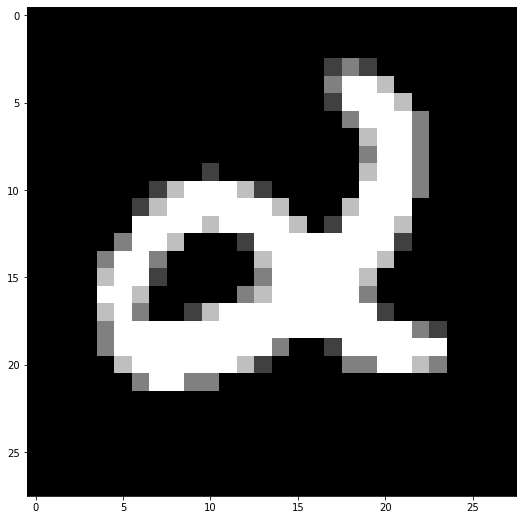

In [32]:
print('Real value is {}'.format(y_test[incorrect_indices[100]]))
print('Predicted value is {}'.format(predicted_classes[incorrect_indices[100]]))
plt.imshow(x_test[incorrect_indices[100]].reshape(28,28), cmap='gray', interpolation='none')

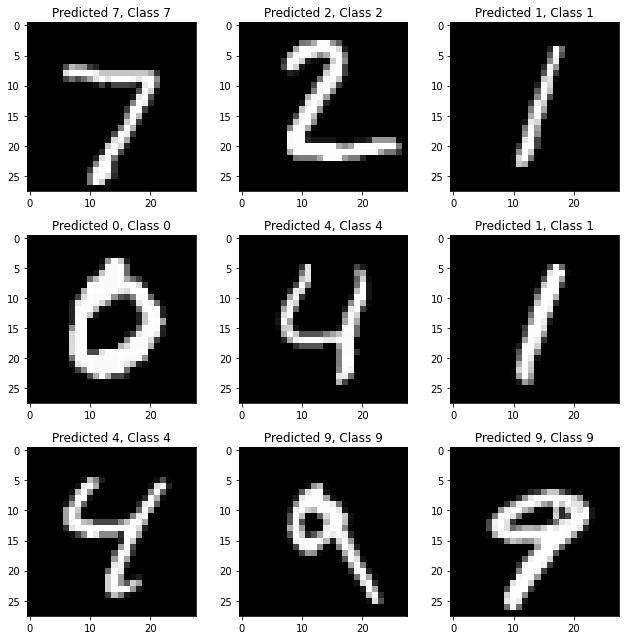

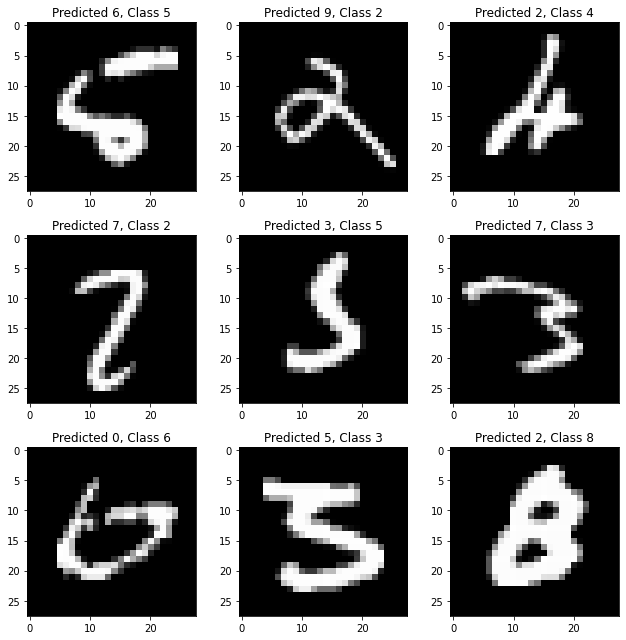

In [33]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()